In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


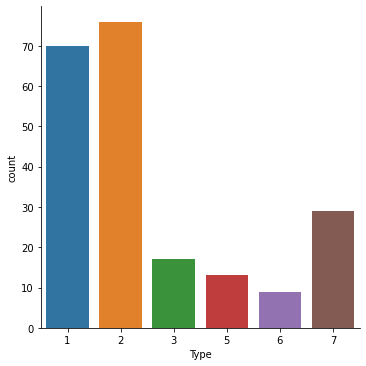

In [3]:
sns.factorplot('Type' , data = data , kind = 'count')

### >> We can see that Type 2 is the majority followed by Type 1 and Type 7

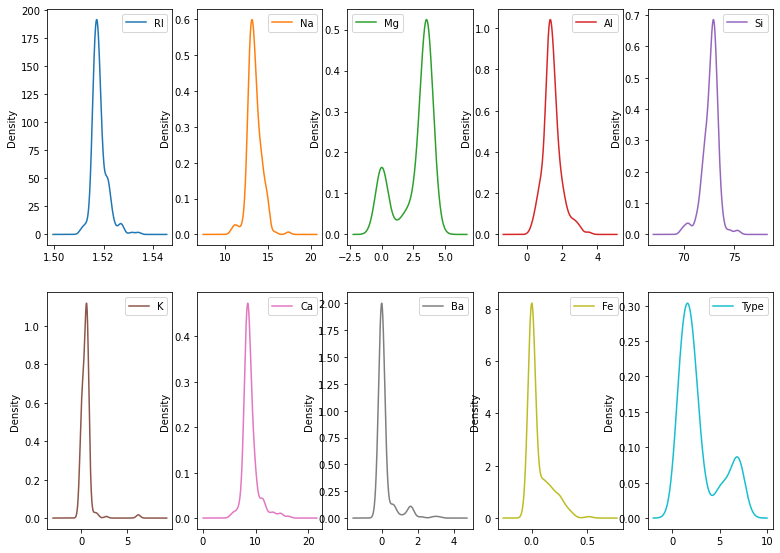

In [4]:
data.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

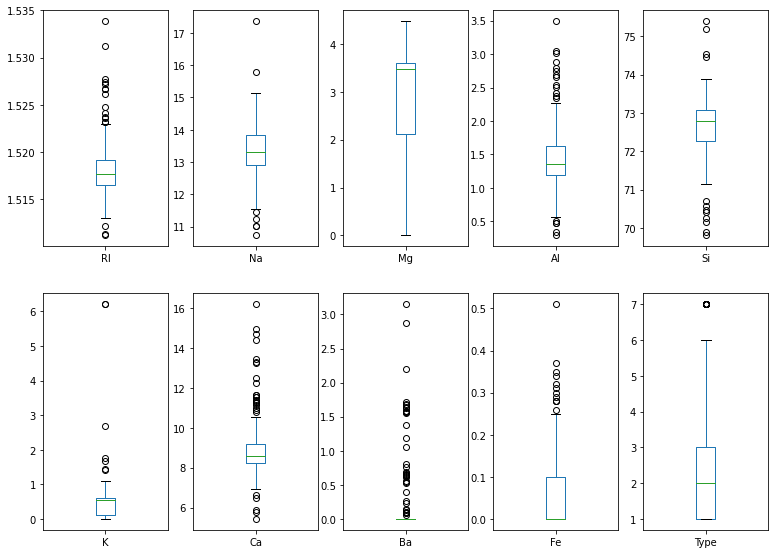

In [5]:
data.plot(kind = 'box' , subplots = True , layout=(4,5), figsize=(13,20 ) , sharex=False, sharey=False)
plt.show()

## Finding Correlation between the variables in data

In [6]:
corr = data.corr()

In [7]:
corr.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

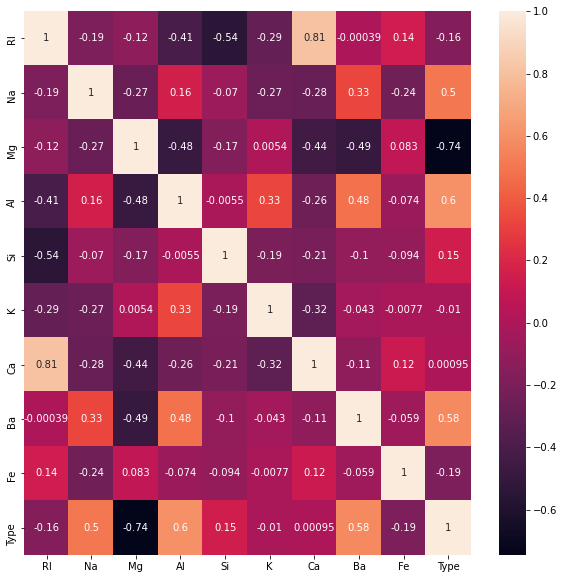

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , annot = True)

### >>> As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

##  KNN
### Finding optimal value of K 

In [9]:
X = data.iloc[:,3:5]
y = data['Type']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state= 1 , stratify= y)

In [11]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [12]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

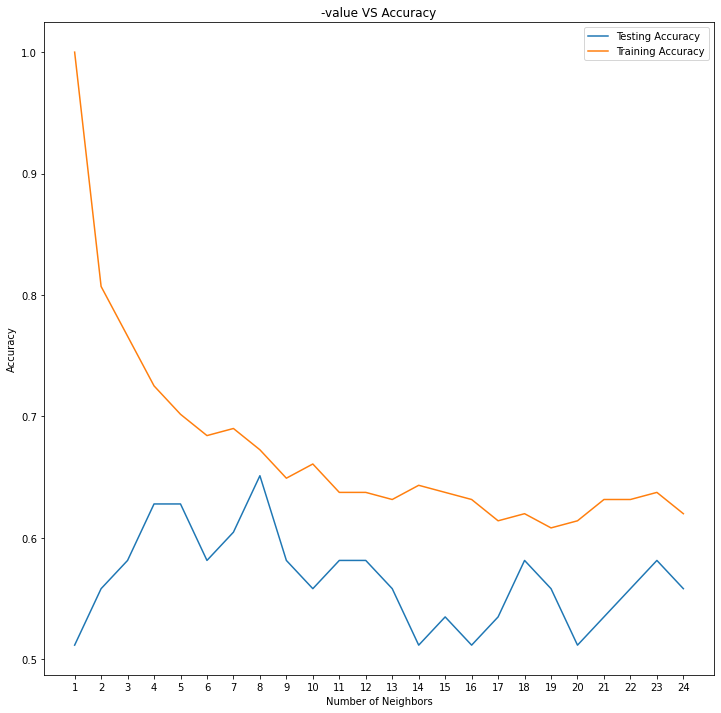

In [13]:
plt.figure(figsize=[12,12])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

### >> we can see that k=4 produces the most accurate results

##  Applying the algorithm


In [14]:
model = KNeighborsClassifier(n_neighbors=4)

In [15]:
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [16]:
scores = []
cv_scores = []

In [17]:
score = accuracy_score(y_pred,y_test)
scores.append(score)

In [20]:
score_knn=cross_val_score(model, X,y, cv=10)

In [21]:
score_knn.mean()

0.6127705627705629

In [22]:
score_knn.std()*2

0.23547117559816877

In [23]:
cv_score = score_knn.mean()

In [24]:
cv_scores.append(cv_score)

In [25]:
cv_scores

[0.6127705627705629]

# 